<a href="https://colab.research.google.com/github/ShimaGhandriz/Alzheimer-Classification/blob/main/Alzheimer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import The Libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

from glob import glob

In [2]:
# to upload file from PC, in this case a kaggle.json file.

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shimaqandriz","key":"feb3d1094353aa481862ec2e4a642e7b"}'}

In [3]:
# I guess it navigates to a specific directory

import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [4]:
# downloads a kaggle dataset to content directory

!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 91% 31.0M/34.1M [00:00<00:00, 82.9MB/s]
100% 34.1M/34.1M [00:00<00:00, 75.8MB/s]


In [5]:
# Unzip the files

from zipfile import ZipFile

with ZipFile('/content/alzheimers-dataset-4-class-of-images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory // mode read r/ w a
   zipObj.extractall()

In [13]:
# Open an image

img = Image.open("/content/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg")
img.show()

In [20]:
# delete one class in train dataset file

!rm '/content/Alzheimer_s Dataset/train/ModerateDemented'/*.jpg # tamame file haye ba pasvand .jpg ra delete mikonad.
!rmdir '/content/Alzheimer_s Dataset/train/ModerateDemented' # directory ra pak mikonad.

In [17]:
# delete one class in test dataset file

!rm '/content/Alzheimer_s Dataset/test/ModerateDemented'/*.jpg
!rmdir '/content/Alzheimer_s Dataset/test/ModerateDemented'

In [28]:
# load the Train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/Alzheimer_s Dataset/train',
     labels = "inferred",
    # class_names=['MildDemented', 'NonDemented', 'VeryMildDemented'],
     batch_size = 32 ,
     image_size = (224, 224) ,
     label_mode = 'categorical'

)

Found 10079 files belonging to 4 classes.


In [38]:
#load the Test dataset

test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/Alzheimer_s Dataset/test',
     labels = "inferred",
     batch_size = 32 ,
     image_size = (224, 224),
     label_mode = 'categorical'
)

Found 1279 files belonging to 4 classes.


In [21]:
# Converts a tf.data.Dataset to an iterable of NumPy arrays

import tensorflow_datasets as tfds

tfds.as_numpy(train_ds)


In [31]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [6]:
##################### Start Here #####################

# Creating new directories to augment each class seperately

!mkdir Alzheimer_dataset_new

!mkdir Alzheimer_dataset_new/train1
!mkdir Alzheimer_dataset_new/train1/Mild
!cp '/content/Alzheimer_s Dataset/train/MildDemented'/*.jpg '/content/Alzheimer_dataset_new/train1/Mild'

!mkdir Alzheimer_dataset_new/train2
!mkdir Alzheimer_dataset_new/train2/Moderate
!cp '/content/Alzheimer_s Dataset/train/ModerateDemented'/*.jpg '/content/Alzheimer_dataset_new/train2/Moderate'

!mkdir Alzheimer_dataset_new/train3
!mkdir Alzheimer_dataset_new/train3/None
!cp '/content/Alzheimer_s Dataset/train/NonDemented'/*.jpg '/content/Alzheimer_dataset_new/train3/None'

!mkdir Alzheimer_dataset_new/train4
!mkdir Alzheimer_dataset_new/train4/VeryMild
!cp '/content/Alzheimer_s Dataset/train/VeryMildDemented'/*.jpg '/content/Alzheimer_dataset_new/train4/VeryMild'

!mkdir Augmented


In [7]:
# Image Augmentation Details

train_datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.1,   #% shift
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip= True,
        fill_mode='nearest')    #Also try constant, reflect, wrap


In [8]:
# Augmentation MildDemented class (and saving them to the original dataset directory)

# It creates almost(!) 57*32 augmented images and adds them to the original data

i = 0
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train1",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=32,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/MildDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 56:
      break

Found 717 images belonging to 1 classes.


In [9]:
lst = os.listdir('Alzheimer_s Dataset/train/MildDemented') # your directory path
number_files = len(lst)
print(number_files)

2503


In [10]:
# Augmentation of ModerateDemented Class

# It creates ALMOST(!) 78*32 augmented images and adds them to the original data


i = 0
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train2",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=32,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/ModerateDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 90:
      break



Found 52 images belonging to 1 classes.


In [18]:
lst = os.listdir('Alzheimer_s Dataset/train/ModerateDemented') # your directory path
number_files = len(lst)
print(number_files)

2424


In [12]:
# Augmentation NonDemented Class

# It creates 1*32 augmented images and adds them to the original data


i = 1
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train3",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=32,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/NonDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 1:
      break


Found 2560 images belonging to 1 classes.


In [14]:
lst = os.listdir('Alzheimer_s Dataset/train/NonDemented') # your directory path
number_files = len(lst)
print(number_files)

2592


In [15]:
# Augmentation VeryMildDemented Class

# It creates 24*32 augmented images and adds them to the original data


i = 1
for batch in train_datagen.flow_from_directory(directory=r"/content/Alzheimer_dataset_new/train4",
                                               target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=32,
                                               class_mode="categorical",
                                               save_to_dir='Alzheimer_s Dataset/train/VeryMildDemented',
                                               save_prefix='aug',
                                               save_format='jpg',
                                               shuffle=True,
                                               #seed=42
                                               ):
    i += 1
    if i > 24:
      break


Found 1792 images belonging to 1 classes.


In [17]:
lst = os.listdir('Alzheimer_s Dataset/train/VeryMildDemented') # your directory path
number_files = len(lst)
print(number_files)

2560


In [39]:
# Loading the Augmented Train Dataset

aug_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
     directory = '/content/Alzheimer_s Dataset/train',
     labels = "inferred",
    #class_names=['MildDemented', 'NonDemented', 'VeryMildDemented'],
     batch_size = 32 ,
     image_size = (224, 224) ,
     label_mode = 'categorical'

)

Found 10079 files belonging to 4 classes.


In [20]:
# Loading the Test Dataset

test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
     directory = '/content/Alzheimer_s Dataset/test',
     labels = "inferred",
     batch_size = 32 ,
     image_size = (224, 224),
     label_mode = 'categorical'
)


Found 1279 images belonging to 4 classes.


['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


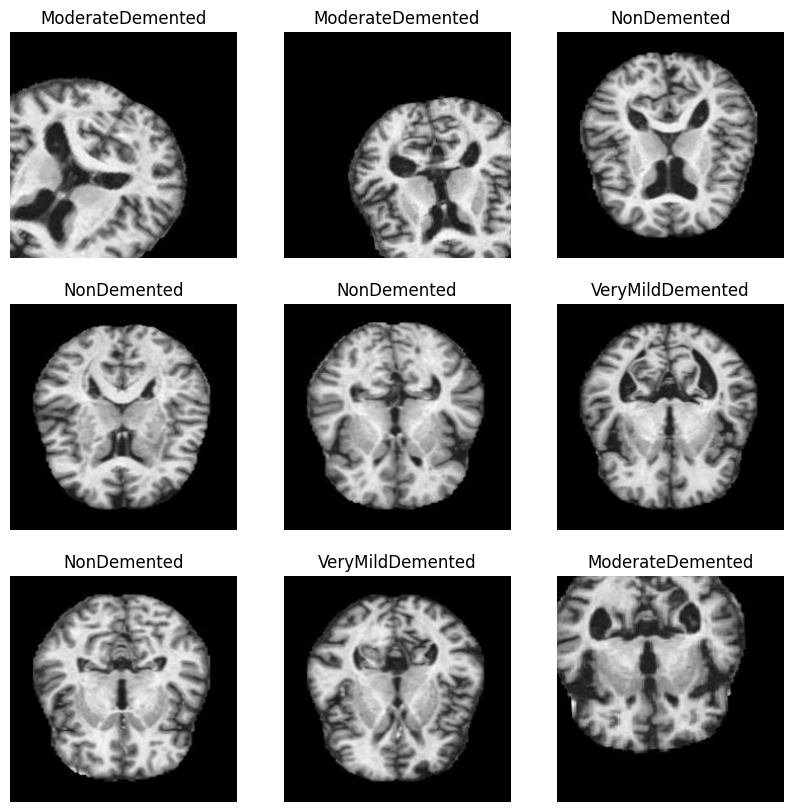

In [42]:
# Data Visualization

class_names = aug_train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in aug_train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.where(labels[i].numpy()==1)[0].tolist()[0]])
    plt.axis("off")

In [46]:
for image_batch, labels_batch in aug_train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
print(train_ds)

(32, 224, 224, 3)
(32, 4)
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [ ]:
resnet = ResNet50(
    weights = 'imagenet', # Default weights.
    include_top = False,   # ,
     pooling='max'
)
print(len(resnet.layers))
for layer in resnet.layers[:174]:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step
176


In [ ]:
base_model = Sequential([data_augmentation]) # Applying augmentation to the model ???
# base_model = Sequential()
base_model.add(resnet)

base_model.add(Dense(512, activation='relu'))
#base_model.add(Dropout(0.1))
base_model.add(Dense(256, activation='relu'))
base_model.add(Dense(3, activation='softmax'))

In [ ]:
base_model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['acc'])


In [ ]:
base_model.build((None, 224,224,3)) # `input_shape` is the shape of the input data
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24,768,899
Trainable params: 1,181,187
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_history = base_model.fit(train_ds,
                                validation_data = test_ds ,
                                steps_per_epoch = len(train_ds),
                                epochs = 10)

Epoch 1/10


159/159 [==============================] - 50s 225ms/step - loss: 1.9612 - acc: 0.4768 - val_loss: 1.2985 - val_acc: 0.5201
Epoch 2/10
159/159 [==============================] - 35s 222ms/step - loss: 0.9605 - acc: 0.5435 - val_loss: 0.9470 - val_acc: 0.5580
Epoch 3/10
159/159 [==============================] - 34s 213ms/step - loss: 0.8840 - acc: 0.5715 - val_loss: 1.2097 - val_acc: 0.3686
Epoch 4/10
159/159 [==============================] - 34s 213ms/step - loss: 0.9242 - acc: 0.5476 - val_loss: 0.9184 - val_acc: 0.5643
Epoch 5/10
159/159 [==============================] - 34s 213ms/step - loss: 0.8659 - acc: 0.5733 - val_loss: 0.9361 - val_acc: 0.5683
Epoch 6/10
159/159 [==============================] - 33s 208ms/step - loss: 0.8477 - acc: 0.5883 - val_loss: 0.9025 - val_acc: 0.5888
Epoch 7/10
159/159 [==============================] - 34s 210ms/step - loss: 0.8448 - acc: 0.5859 - val_loss: 0.8845 - val_acc: 0.5691
Epoch 8/10
159/159 [==============================] - 34s 213ms/st

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)
np.random.rand(1)

array([0.37454012])

In [ ]:
np.random.seed(42)
np.random.rand(1)

array([0.37454012])